<a href="https://colab.research.google.com/github/JeonJeongumggumg/PyTorch/blob/main/MyLRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression example

In [3]:
#학습데이터 정의
import numpy as np
loaded_data = np.loadtxt('/content/drive/MyDrive/DeepLearningbook/LEC06_TrainData.csv', delimiter=',')

x_train_np = loaded_data[:, 0:-1]
y_train_np = loaded_data[:, [-1]]

print(loaded_data[:3])
print('~~~~~~~~~~~~~~~~~~~')
print(x_train_np[:3])
print('~~~~~~~~~~~~~~~~~~~')
print(y_train_np[:3])

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]]
~~~~~~~~~~~~~~~~~~~
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]]
~~~~~~~~~~~~~~~~~~~
[[-4.]
 [ 4.]
 [-6.]]


In [5]:
import torch
from torch import nn

x_train = torch.Tensor(x_train_np) #넘파이로부터 파이토치 텐서를 생성
y_train = torch.Tensor(y_train_np)

class MyLRM(nn.Module): #파이토치 선형회귀 모델 구축
    def __init__(self, input_nodes):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(input_nodes, 1) #계층입력데이터(노드)개수,출력데이터(노드)개수
        )
    def forward(self, data):
        prediction = self.linear_stack(data)

        return  prediction


In [16]:
model = MyLRM(3)#입력데이터가 3개인 선형회귀 모델 인스턴스 생성

for name,child in model.named_children(): #모델파라미터(가중치, 바이어스)값을 확인
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[-0.5758,  0.0803,  0.1175]], requires_grad=True)
linear_stack Parameter containing:
tensor([-0.1372], requires_grad=True)


In [17]:
loss_function = nn.MSELoss() #선형회귀 문제이므로 손실함수는 평균제곱의 오차인 nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-2) #옵티마이저는 확률적 경사하강법

In [18]:
loss_list = []
nums_epoch = 2000

for epoch in range(nums_epoch+1):

    prediction = model(x_train) #모델에 데이터를 전달하면 클래스의 forwaed함수가 자동으로 전달(따로하면 안된다)
    loss = loss_function(prediction, y_train) #선형회귀 모델의 예측값과 정답과의 오차를 계산

    loss_list.append(loss.item())

    optimizer.zero_grad() #역전파코드, 학습이 진행됨에 따라 모델파라미터를 업데이트하면서 최적화
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch = ', epoch, 'current loss = ', loss.item())

epoch =  0 current loss =  30.758716583251953
epoch =  100 current loss =  0.1782674491405487
epoch =  200 current loss =  0.0014248259831219912
epoch =  300 current loss =  2.025670801231172e-05
epoch =  400 current loss =  3.229483809263911e-06
epoch =  500 current loss =  1.062518208527763e-06
epoch =  600 current loss =  3.5949571497440047e-07
epoch =  700 current loss =  1.2169040530807251e-07
epoch =  800 current loss =  4.1346293500055253e-08
epoch =  900 current loss =  1.4029162720419208e-08
epoch =  1000 current loss =  4.7239590017511546e-09
epoch =  1100 current loss =  1.6519218215549358e-09
epoch =  1200 current loss =  6.128054175214004e-10
epoch =  1300 current loss =  2.4358023931192463e-10
epoch =  1400 current loss =  1.14789275307281e-10
epoch =  1500 current loss =  5.630816646284842e-11
epoch =  1600 current loss =  3.8342887892506283e-11
epoch =  1700 current loss =  3.0042156262677366e-11
epoch =  1800 current loss =  2.1173856071254882e-11
epoch =  1900 current

모델링 확인하기

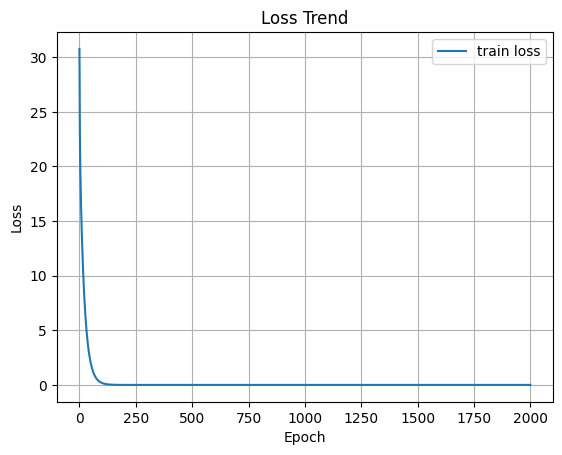

In [19]:
import matplotlib.pyplot as plt
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

plt.plot(loss_list, label = 'train loss')
plt.legend(loc = 'best')
plt.show()

In [20]:
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack Parameter containing:
tensor([-7.1781e-06], requires_grad=True)


가중치 w1,w2,w3가 랜덤한 값에서 원한 값으로 변화

바이어스도 랜덤한 값에서 특정값으로 수렴

--> 최적화 완료

In [21]:
#임의의 데이터 입력

x_test = torch.Tensor([[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]])

label = [2*data[0] -3*data[2] +2*data[2] for data in x_test]

pred = model(x_test) #학습 완료된 모델에 테스트 데이터를 대입

print(pred)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(label)


tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)
~~~~~~~~~~~~~~~~~~~~~~~~~~
[tensor(10.), tensor(3.), tensor(-1.), tensor(18.), tensor(10.)]


?????????????????????????????????????????